<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [50]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [51]:
movies.info

<bound method DataFrame.info of      star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2         

In [52]:
# Answer: 979 rows; 6 columns

#### Check the data type of each column.

In [53]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [54]:
# Answer: float64, integers, objects

#### Calculate the average movie duration.

In [55]:
movies['duration'].mean()

120.97957099080695

In [56]:
# Answer: average movie time is approximately 121 minutes

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [57]:
movies.sort_values('duration', ascending=True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


In [58]:
# Answer: shortest = Freaks; longest = Hamlet

#### Create a histogram of duration, choosing an "appropriate" number of bins.

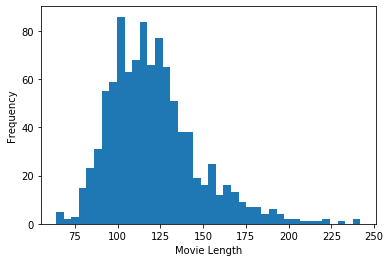

In [59]:
movies['duration'].plot.hist(bins=40)
plt.xlabel('Movie Length');

In [60]:
# Answer: For my bins calculation I used Rice's rule which yielded approximate 39.71 and rounded up to 40

#### Use a box plot to display that same data.

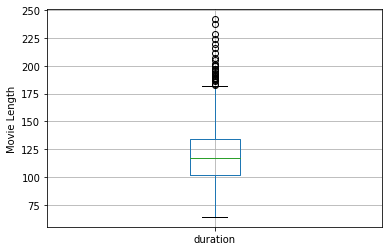

In [61]:
# Answer:
movies.boxplot('duration');
plt.ylabel('Movie Length');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [62]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

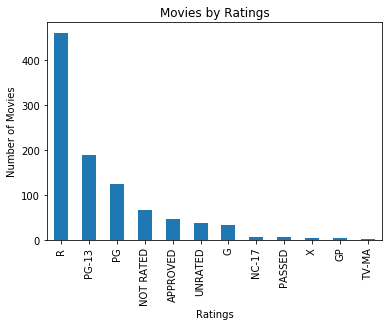

In [72]:
# Answer: 
movies_2 = movies['content_rating'].value_counts()
movies_2.plot(kind = 'bar', title='Movies by Ratings');
plt.xlabel('Ratings');
plt.ylabel('Number of Movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [78]:
# Answer:
movies['content_rating'].replace(
    to_replace=['NOT RATED', 'APPROVED', 'PASSED', 'GP'],
    value='UNRATED',
    inplace=True
)

In [79]:
movies.head(50)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [80]:
# Answer:
movies['content_rating'].replace(
    to_replace=['X', 'TV-MA',],
    value='NC-17',
    inplace=True
)

In [81]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [83]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [84]:
# Answer:
movies['content_rating'].fillna('reasonable', inplace = True)

In [86]:
movies['content_rating'].value_counts()

R             460
PG-13         189
UNRATED       160
PG            123
G              32
NC-17          12
reasonable      3
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [94]:
# Answer:
movies['star_rating'].mean()


7.8897854954034985

In [125]:
#1 
moviesover2 = movies['duration'] >= 120
moviesunder2 = movies['duration']  < 120 

In [123]:
movies[moviesover2]['star_rating'].mean()

7.948898678414082

In [126]:
movies[moviesunder2]['star_rating'].mean()

7.838666666666657

In [124]:
# Answer: movies over 2 hours tend to have a higher imdb rating than movies under 2 hours

In [96]:
#alternative solution attempt
import numpy as np

#movies_over2 = np.where(movies['duration'] > 120)
#movies_over2['star_rating'].mean()

#movies_under2 = np.where(movies['duration'] < 120, True, False)
#movies_under2('star_rating').mean()

#error issue: tuple indices must be integers or slices, not str


#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [127]:
# Answer:
import seaborn as sns

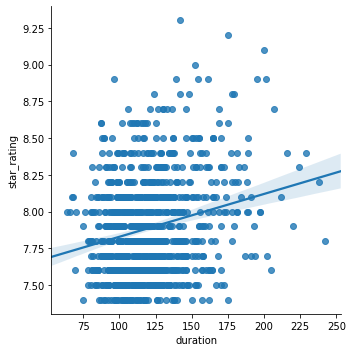

In [138]:
sns.lmplot(x='duration', y='star_rating', data=movies)

#### Calculate the average duration for each genre.

In [89]:
# Answer: 
movies.groupby(['genre'])['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

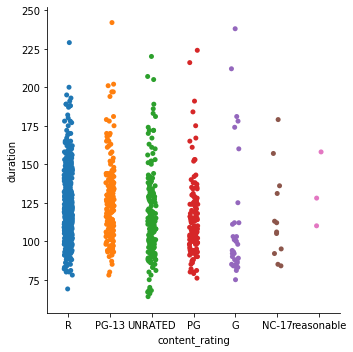

In [147]:
# Answer:
sns.catplot(x='content_rating', y='duration', data=movies)

#### Determine the top rated movie (by star rating) for each genre.

In [145]:
# Answer: 
movies.groupby(['genre', 'title'])['star_rating'].max(ascending=True)

genre    title                         
Action   300                               7.8
         A Fistful of Dollars              8.1
         Aliens                            8.4
         Apocalypto                        7.8
         Avatar                            7.9
                                          ... 
Western  Once Upon a Time in the West      8.6
         Rio Bravo                         8.1
         The Good, the Bad and the Ugly    8.9
         The Outlaw Josey Wales            7.9
         Unforgiven                        8.3
Name: star_rating, Length: 976, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [146]:
# Answer: There are duplicates
movies['title'].duplicated().any() 

True

In [ ]:
#did not complete the second part

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!